In [ ]:
"""
Assignment: 1
Task : Perceptron
ID: 190104140
Section: C2

"""

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

**Q1. Take input from “train.txt” file. Plot all sample points from both classes, but samples from the same class should have the same color and marker. Observe if these two classes can be separated with a linear boundary.**

In [41]:
dataset = pd.read_csv(r'/content/train-perceptron.txt', header = None, names = ['x1', 'x2', 'class'], sep = ' ')
dataset

,x1,x2,class
0,1,1.0,1
1,1,-1.0,1
2,2,2.5,2
3,0,2.0,2
4,2,3.0,2
5,4,5.0,1


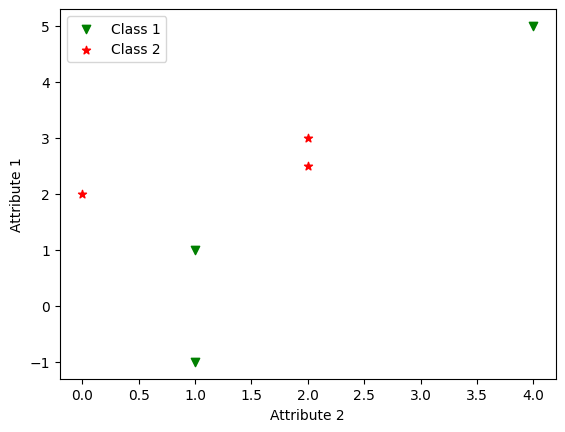


 >> These two classes can not be separated with a linear boundary.


In [42]:
# Plotting values of class 1
x1 = dataset.loc[dataset['class'] == 1, 'x1'].to_numpy()
x2 = dataset.loc[dataset['class'] == 1, 'x2'].to_numpy()

plt.scatter(x1, x2, label = 'Class 1', marker = 'v', color = 'g')

# Plotting values of class 2
x1 = dataset.loc[dataset['class'] == 2, 'x1'].to_numpy()
x2 = dataset.loc[dataset['class'] == 2, 'x2'].to_numpy()

plt.scatter(x1, x2, label = 'Class 2', marker = '*', color = 'r')
plt.xlabel("Attribute 2")
plt.ylabel("Attribute 1")

plt.legend()
plt.show()

print("\n >> These two classes can not be separated with a linear boundary.")

**Q2. Consider the case of a second order polynomial discriminant function. Generate the high dimensional sample points y, as discussed in the class. Also, normalize any one of the two classes.**

In [43]:
# Generating high dimensional sample points.

dataset['x1sq'] = dataset['x1']**2
dataset['x2sq'] = dataset['x2']**2
dataset['x1x2'] = dataset['x1']*dataset['x2']
dataset['c'] = 1

dataset = dataset.sort_values(by=['class'])
dataset[['x1sq', 'x2sq', 'x1x2', 'x1', 'x2', 'c', 'class']]

,x1sq,x2sq,x1x2,x1,x2,c,class
0,1,1.00,1.0,1,1.0,1,1
1,1,1.00,-1.0,1,-1.0,1,1
5,16,25.00,20.0,4,5.0,1,1
2,4,6.25,5.0,2,2.5,1,2
3,0,4.00,0.0,0,2.0,1,2
4,4,9.00,6.0,2,3.0,1,2


In [44]:
# Applying normalization for class 1

columns_to_normalize = ['x1sq', 'x2sq', 'x1x2', 'x1', 'x2', 'c']

normalized = dataset.loc[dataset['class'] == 1, columns_to_normalize].apply(lambda x: (x*-1))

dataset.update(normalized)
dataset[['x1sq', 'x2sq', 'x1x2', 'x1', 'x2', 'c', 'class']]

,x1sq,x2sq,x1x2,x1,x2,c,class
0,-1.0,-1.00,-1.0,-1.0,-1.0,-1.0,1
1,-1.0,-1.00,1.0,-1.0,1.0,-1.0,1
5,-16.0,-25.00,-20.0,-4.0,-5.0,-1.0,1
2,4.0,6.25,5.0,2.0,2.5,1.0,2
3,0.0,4.00,0.0,0.0,2.0,1.0,2
4,4.0,9.00,6.0,2.0,3.0,1.0,2


**Q3. Use Perceptron Algorithm (both one at a time and many at a time) for finding the weight coefficients of the discriminant function (i.e., values of w) boundary for your linear classifier in task 2. Here α is the learning rate and 0 < α ≤ 1.**

In [45]:
# Function for updating weight for MANY row at a time

def perceptron_m(X, w, lr):
  w = w.reshape(-1, 1)
  update_count = 1

  while(1):
    Y = X @ w
    Y = np.squeeze(Y.to_numpy())

    # print(f'Predictions: {Y}')
    # print(f'{update_count}. Weights:', np.squeeze(w))

    if np.all(Y > 0):
      break

    sum_x = X[Y <= 0].sum(axis = 0)
    sum_x = sum_x.to_numpy().reshape(-1, 1)

    w = w + lr*sum_x
    update_count += 1

  return update_count

In [46]:
# Function for updating weight for ONE row at a time

def perceptron_o(X, w, lr):
  X = X.to_numpy()
  update_count = 0
  rc_count = 0

  while(rc_count != X.shape[0]):
    rc_count = 0
    for i in range(X.shape[0]):
      Y = X[i] @ w.reshape(-1, 1)
      
      # print(f'Predictions: {Y}')
      # print(f'{update_count}. Weights:', np.squeeze(w))

      if Y <= 0:
        w = w + lr * X[i]
        update_count += 1
      else:
        rc_count += 1

  return update_count

**Q4. Three initial weights have to be used (all one, all zero, randomly initialized with seed fixed). For all of these three cases vary the learning rate between 0.1 and 1 with step size 0.1. Create a table which should contain your learning rate, number of iterations for one at a time and batch Perceptron for all of the three initial weights. You also have to create a bar chart visualizing your table data.**

In [47]:
X = dataset[['x1sq', 'x2sq', 'x1x2', 'x1', 'x2', 'c']]
learning_rates = np.arange(0.1, 1.1, 0.1)

In [48]:
# Counting iteration using ZEROS as weights 
df1 = pd.DataFrame(columns=['Learning Rate','One at a time','Many at a time'])

weights = np.zeros(6)

print("--- Initial Weights = all ZEROS ---")
for a in learning_rates:
  df1 = df1.append({'Learning Rate': a, 'One at a time': perceptron_o(X, weights, a), 'Many at a time': perceptron_m(X, weights, a)}, ignore_index=True)

df1

--- Initial Weights = all ZEROS ---


,Learning Rate,One at a time,Many at a time
0,0.1,184.0,105.0
1,0.2,184.0,105.0
2,0.3,184.0,92.0
3,0.4,184.0,105.0
4,0.5,184.0,92.0
5,0.6,184.0,92.0
6,0.7,184.0,92.0
7,0.8,184.0,105.0
8,0.9,184.0,105.0
9,1.0,184.0,92.0


In [49]:
# Counting iteration using ONES as weights
df2 = pd.DataFrame(columns=['Learning Rate','One at a time','Many at a time'])
weights = np.ones(6)

print("--- Initial Weights = all ONES ---")
for a in learning_rates:
  df2 = df2.append({'Learning Rate': a, 'One at a time': perceptron_o(X, weights, a), 'Many at a time': perceptron_m(X, weights, a)}, ignore_index=True)

df2

--- Initial Weights = all ONES ---


,Learning Rate,One at a time,Many at a time
0,0.1,227.0,103.0
1,0.2,222.0,95.0
2,0.3,195.0,122.0
3,0.4,207.0,95.0
4,0.5,186.0,108.0
5,0.6,205.0,107.0
6,0.7,180.0,102.0
7,0.8,215.0,106.0
8,0.9,205.0,90.0
9,1.0,185.0,107.0


In [50]:
# Counting iteration using RANDOM weights
df3 = pd.DataFrame(columns=['Learning Rate','One at a time','Many at a time'])
np.random.seed(10)
weights = np.random.rand(6)

print("--- Initial Weights = all RANDOM ---")
for a in learning_rates:
  df3 = df3.append({'Learning Rate': a, 'One at a time': perceptron_o(X, weights, a), 'Many at a time': perceptron_m(X, weights, a)}, ignore_index=True)

df3

--- Initial Weights = all RANDOM ---


,Learning Rate,One at a time,Many at a time
0,0.1,209.0,96.0
1,0.2,194.0,113.0
2,0.3,174.0,102.0
3,0.4,206.0,105.0
4,0.5,185.0,119.0
5,0.6,217.0,105.0
6,0.7,217.0,116.0
7,0.8,205.0,117.0
8,0.9,205.0,101.0
9,1.0,212.0,101.0


In [51]:
# Function for ploting the bar chart
def plot_bar_chart(x, y, z, title):
    
    fig, ax = plt.subplots(figsize=(8,6))
    ax.bar(x, y, width = 0.03, align = 'center', label =' One at a time')
    ax.bar(x + 0.03, z, width = 0.03, align ='center', label = 'Many at a time')

    plt.xlabel('Learning Rate')
    plt.ylabel('Iterations')
    plt.title(title)
    plt.xticks(x)
    plt.legend()
    plt.show()

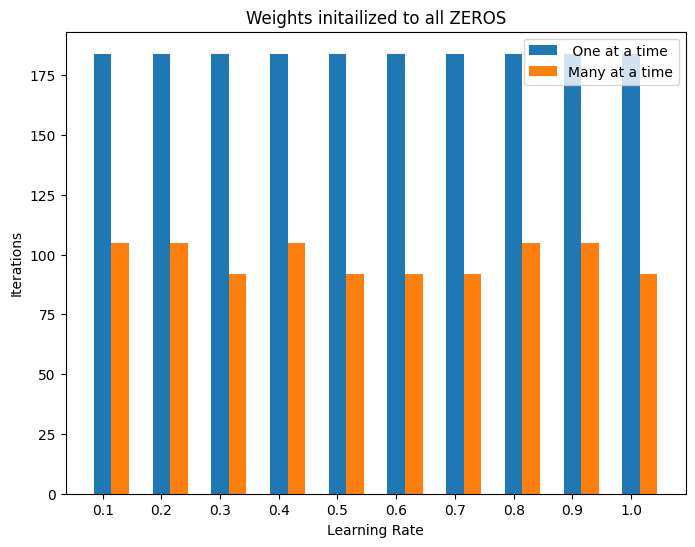

In [52]:
# Ploting the bar chart for weights all ZEROS
plot_bar_chart(df1['Learning Rate'], df1['One at a time'], df1['Many at a time'], 'Weights initailized to all ZEROS')

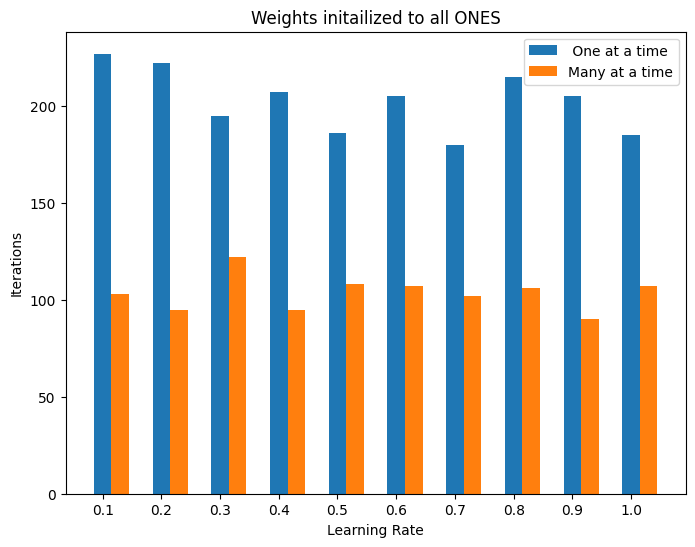

In [53]:
# Ploting the bar chart for weights all ONES
plot_bar_chart(df2['Learning Rate'], df2['One at a time'], df2['Many at a time'], 'Weights initailized to all ONES')

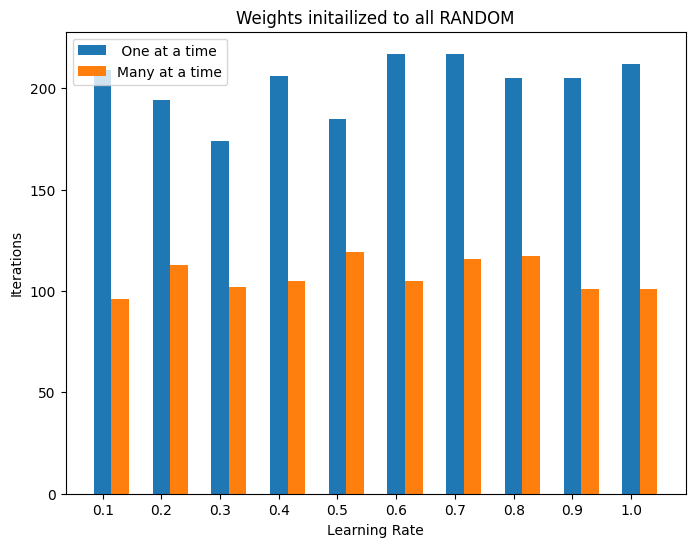

In [54]:
# Ploting the bar chart for weights all RANDOM
plot_bar_chart(df3['Learning Rate'], df3['One at a time'], df3['Many at a time'], 'Weights initailized to all RANDOM')

**4a. In task 2, why do we need to take the sample points to a high dimension?**

Ans: *We needed to take the sample points to a high dimension using a phi function beacuse they were not linearly separable. By taking the points to a higher dimension, we can seperate them easily for further analysis.*

**4b. In each of the three initial weight cases and for each learning rate, how many updates does the algorithm take before converging?**

Ans. The number of update for each learning rate on each three weight cases cab be seen the the tables printed previously and bar charts are also generated on the cell above.
